# GDS Designer

This small-scale designer was created by me (Emma) as a tool to help students generate simple layouts more quickly. Hopefully, it proves to be helpful! :)

In [1]:
import pya
import matplotlib.pyplot as plt
from KlayoutDesigner import ORIENTATION, Designer

%matplotlib inline

# Construct Layout

In [2]:
TEMP_FILENAME = "temp300.gds"    # Just a temp file, name does not matter
OUTPUT_FILENAME = "TestFile.gds" # Name this whatever you want it to be :)

# If you need a marker in you design make it in a seperate file for an easy workflow
# If no marker name is given the program should just display a cross at that position
MARKER_FILENAME = "Diamond_Marker.gds" 

To make a design you first need to initialize the underlying scripts and make a plot. This will make it a bit quicker to work with as you don't need to open Klayout everytime.

In [3]:
dbu = 0.001 # Data base units
layer_amount = 3 # because we have a marker we need an extra layer

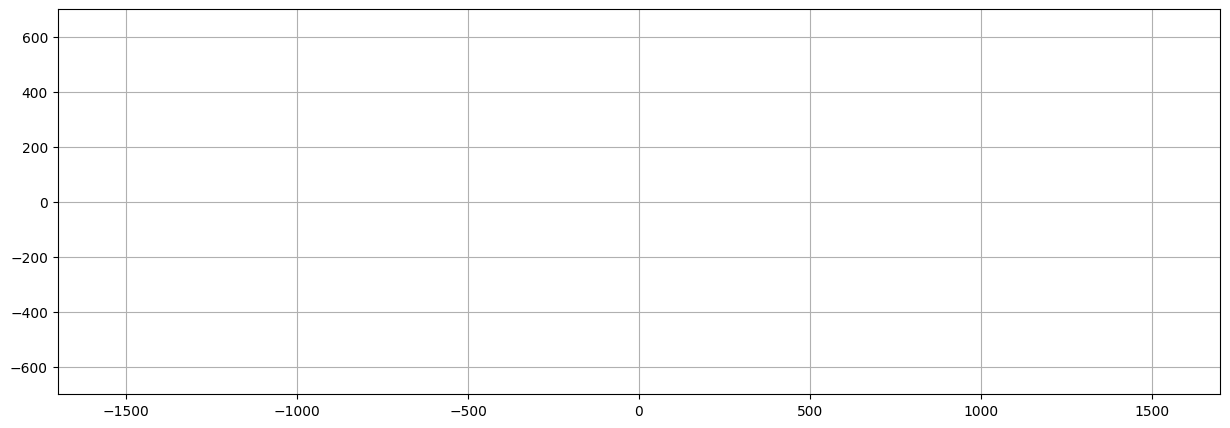

In [4]:
fig, ax = plt.subplots(figsize = (15, 5))

# Initialize the system
drawer = Designer(pya.Layout(), dbu, layer_amount, ax, TEMP_FILENAME, MARKER_FILENAME, OUTPUT_FILENAME)

# Bars or Lines
I called them bars but that doesn't matter, lets try to make some!

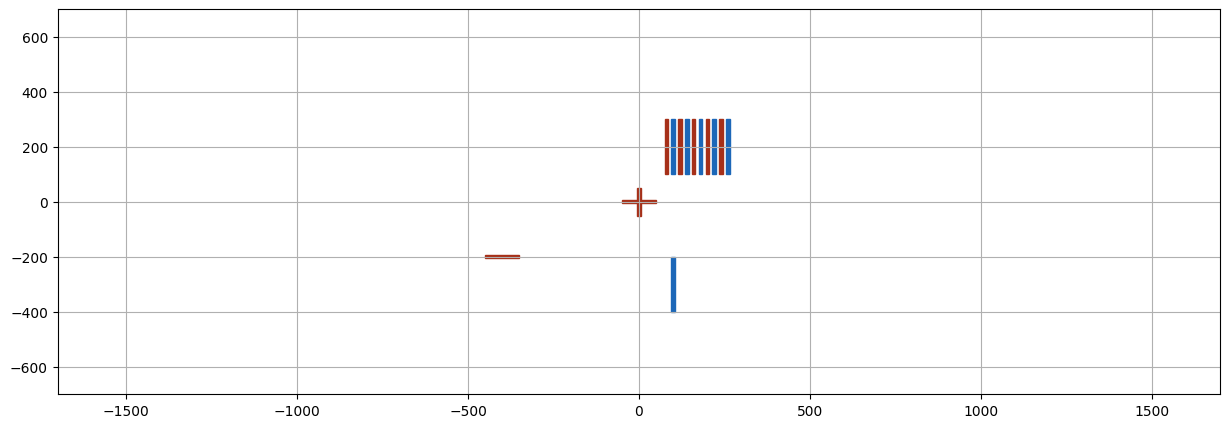

In [5]:
fig, ax = plt.subplots(figsize = (15, 5))
drawer = Designer(pya.Layout(), dbu, layer_amount, ax, TEMP_FILENAME, MARKER_FILENAME, OUTPUT_FILENAME)

# Lets draw one horizontal bar/line
# Give it an x and y position like -400 and -200
# Give it a length like 100
# Give it a width like 10 and give it a layer like 1 or 2
drawer.bar(-400, -200, 100, 10, 1)

# Ofcourse you can do the same for a vertical line
# Lets make this one on layer 2
drawer.bar(100, -300, 10, 200, 2)

# Maybe you want a whole array of lines?
# Lets alternate the layers just like the designs I used
for i in range(10):
    if i % 2 == 0:
        drawer.bar(80 +i*20, 200, 10, 200, 1)
    else:
        drawer.bar(80 +i*20, 200, 10, 200, 2)
        
# Also.. crosses are just fancy lines right?
# Lets draw one here
# Give it an x and y position like 0 and 0
# Give it a length like 100
# Give it a width like 10 and give it a layer like 1, please do 1..
drawer.cross(0,0,10,100,1)

drawer.draw()

# Verniers

Now lets make some verniers in all the flavors we want!

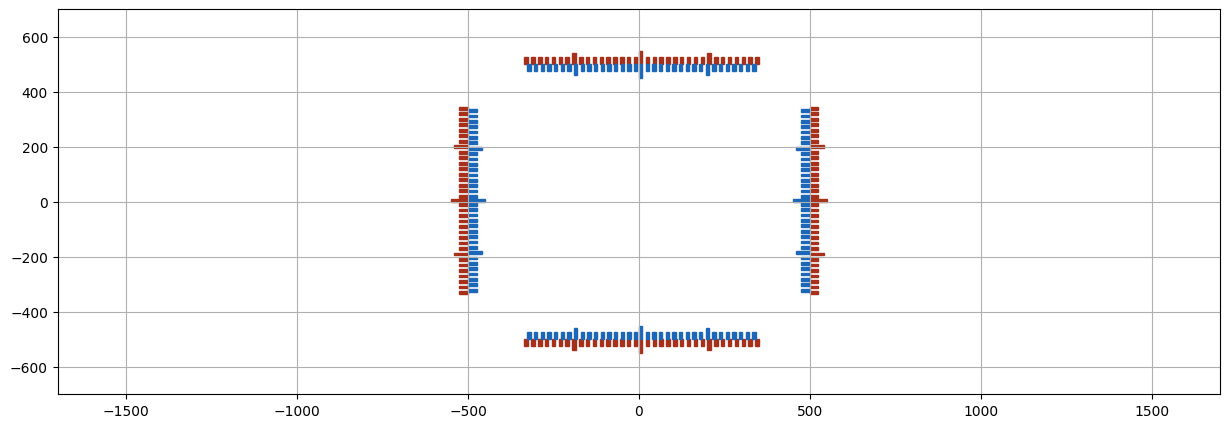

In [9]:
fig, ax = plt.subplots(figsize = (15, 5))
drawer = Designer(pya.Layout(), dbu, layer_amount, ax, TEMP_FILENAME, MARKER_FILENAME, OUTPUT_FILENAME)

# Lets draw a vernier
# Give it an x and y position like 0 and -500
# Give it a main scale separtion
# Give it a vernier scale separtion
# Give it a width like 10
# Give the layers for the main scale and the vernieer like 1 and 2
# Give it a maximum length like 700
# Give it an orientation like ORIENTATION.BOTTOM
drawer.vernier(0.0, 500, 10.0, 9.5, 10, 1, 2, 700, ORIENTATION.TOP)

# Maybe you want a different orientation?
# Thats easy!
drawer.vernier(0, -500.0, 10.0, 9.5, 10, 1, 2, 700, ORIENTATION.BOTTOM)
drawer.vernier(-500.0, 0.0, 10.0, 9.5, 10, 1, 2, 700, ORIENTATION.LEFT)
drawer.vernier(500, 0.0, 10.0, 9.5, 10, 1, 2, 700, ORIENTATION.RIGHT)

drawer.draw()

# Markers

Markers are bit more special as they are really picky over when they want to be drawn. So we actually ad them after drawing the other parts.

Marker selected! GDS will contain: Diamond_Marker as a marker.


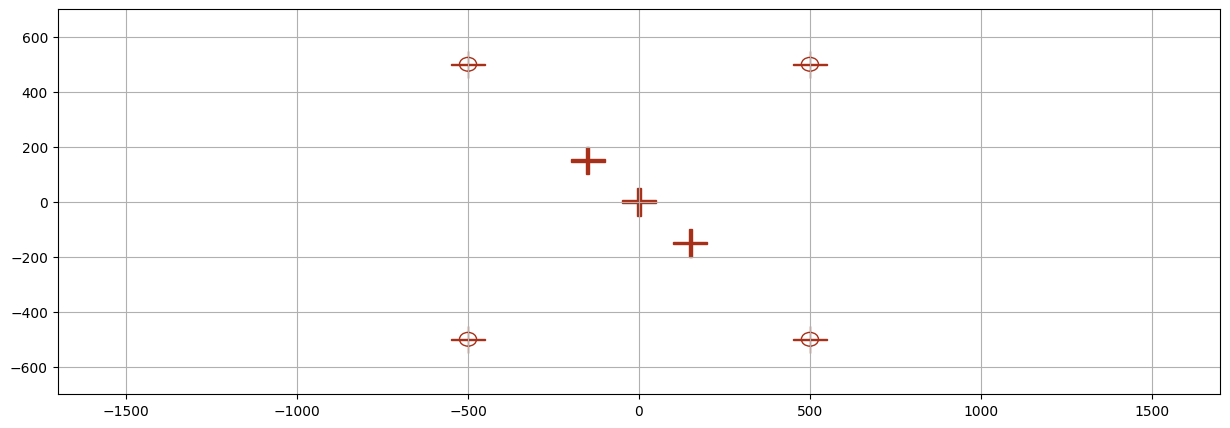

In [13]:
fig, ax = plt.subplots(figsize = (15, 5))
drawer = Designer(pya.Layout(), dbu, layer_amount, ax, TEMP_FILENAME, MARKER_FILENAME, OUTPUT_FILENAME)

# Draw whatever your layout should be
drawer.cross(-150,150,10,100,1)
drawer.cross(0,0,10,100,1)
drawer.cross(150,-150,10,100,1)

# Normal draw call
drawer.draw()

# We give it a layer and give it multiple positions! As many as you want!
# If it doesn't show up in Klayout don't panic, just restart and play with the draw calls
drawer.marker(1, 
              (-500, 500), 
              (500, -500), 
              (-500, -500), 
              (500, 500)
             )